<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [448]:
#loading dataset
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [449]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome

In [451]:
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [452]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.004)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Print tree attributes
print("Tree depth",model.tree_.max_depth)
print("Tree nodes",model.tree_.node_count)

#Predict the response for test dataset
y_pred = model.predict(x_train)
print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred)*100)

#Predict the response for test dataset
y_pred = model.predict(x_test)
print("Test set Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Tree depth 8
Tree nodes 37
Train set accuracy: 84.03908794788273
Test set Accuracy: 79.22077922077922


In [453]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Accuracy from confusion matrix:",( (cm[0][0]+cm[1][1]) / cm.sum() ))
print("Confusion Matrix:", cm)

Accuracy from confusion matrix: 0.7922077922077922
Confusion Matrix: [[82 19]
 [13 40]]


In [454]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.81      0.84       101
           1       0.68      0.75      0.71        53

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.78       154
weighted avg       0.80      0.79      0.79       154



In [455]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [461]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

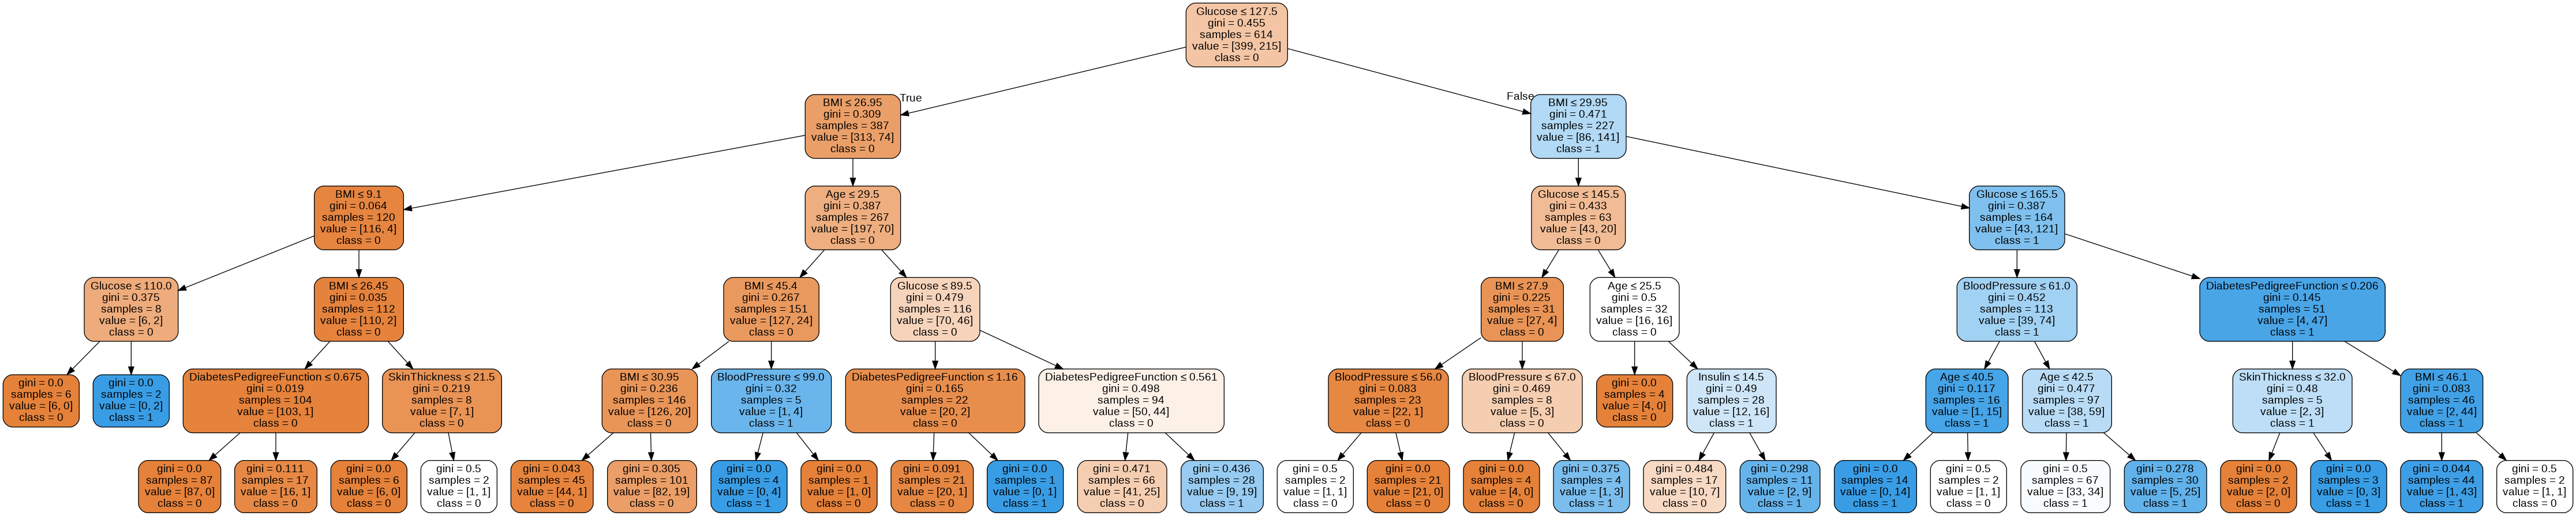

In [463]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [487]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="gini", max_depth=9)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

#Print tree attributes
print("Tree depth",model.tree_.max_depth)
print("Tree nodes",model.tree_.node_count)

# Model Accuracy
y_pred = model.predict(x_train)
print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred)*100)

#Predict the response for test dataset
y_pred = model.predict(x_test)
print("Test set Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Tree depth 9
Tree nodes 169
Train set accuracy: 94.13680781758957
Test set Accuracy: 72.72727272727273


The classification rate increased to 79.87%, which is better accuracy than the previous model.



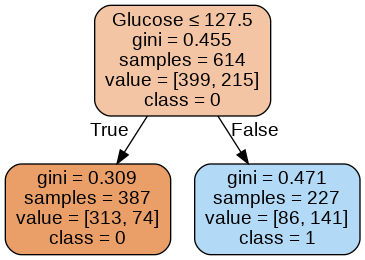

In [472]:
#Better Decision Tree Visualisation
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())